# Competição DSA 01/2019 


## Análise exploratória

In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Pegando .csv 
#df = pd.read_csv('../input/denzel-imdb-movies/filmes_denzel_V2.csv',sep=',', encoding='ISO-8859-1')
df = pd.read_csv('C:/DSA/Competicao01_DSA/dataset_treino.csv',sep=',', encoding='ISO-8859-1')
dfTest = pd.read_csv('C:/DSA/Competicao01_DSA/dataset_teste.csv',sep=',', encoding='ISO-8859-1')
df.head(10)

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
#Shape Treino e Teste
print("Shape df Treino: ", df.shape)
print ("Shape df Teste: ", dfTest.shape)

In [ ]:
#Data Types
print ("==== Treino ==== \n", df.dtypes)
print ("\n ==== Teste ==== \n", dfTest.dtypes)

In [ ]:
df.describe()

In [ ]:
dfTest.describe()

In [ ]:
#Colunas Com valores nulos
print("==== Treino ====\n", df.isnull().any())
print("\n ==== Teste ==== \n", dfTest.isnull().any())

In [ ]:
#Tendo uma noção da distribuição das classes
df['classe'].value_counts()

In [ ]:
c0, c1 = df['classe'].value_counts()
ct = c0 + c1

print("Classe 0:", (c0/ct)*100)
print("Classe 1: ", (c1/ct)*100)

In [4]:
#Bibliotecas de visualização
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Histogram
df['classe'].hist()
plt.show()

In [ ]:
df['idade'].hist()
plt.show()

In [ ]:
df['glicose'].hist()
plt.show()

In [ ]:
df['glicose'].hist()
plt.show()

In [ ]:
df['num_gestacoes'].hist()
plt.show()

In [5]:
#Vendo se há alguma correlação entre as variáveis
correlacoes = df.corr()
print (correlacoes)

                         id  num_gestacoes   glicose  pressao_sanguinea  \
id                 1.000000      -0.081928 -0.033261          -0.022520   
num_gestacoes     -0.081928       1.000000  0.139924           0.118589   
glicose           -0.033261       0.139924  1.000000           0.143653   
pressao_sanguinea -0.022520       0.118589  0.143653           1.000000   
grossura_pele      0.028834      -0.080628  0.054515           0.197539   
insulina          -0.000328      -0.055261  0.339553           0.094150   
bmi               -0.013234       0.034970  0.216336           0.271557   
indice_historico  -0.002386      -0.051889  0.144771           0.008882   
idade              0.008577       0.532926  0.274294           0.226710   
classe            -0.091694       0.207922  0.449891           0.062860   

                   grossura_pele  insulina       bmi  indice_historico  \
id                      0.028834 -0.000328 -0.013234         -0.002386   
num_gestacoes          -0.

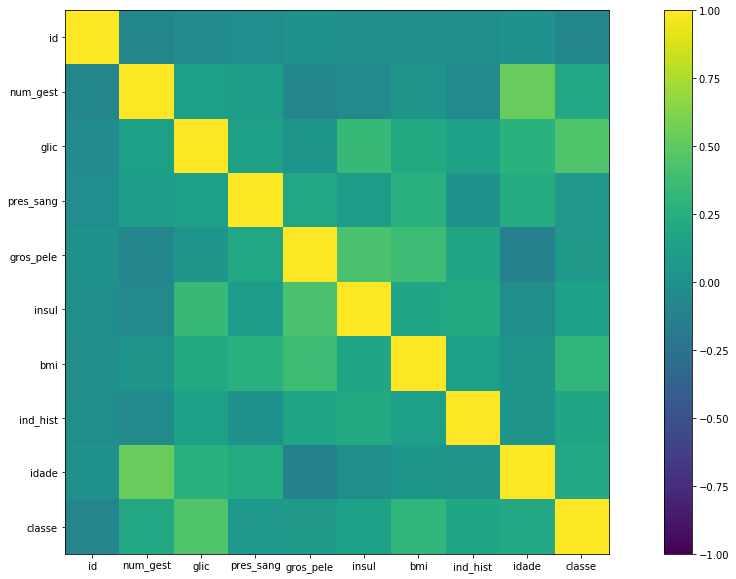

In [6]:
#Visualizando as correlações 
cols = ['id', 'num_gest', 'glic', 'pres_sang','gros_pele', 'insul', 'bmi', 'ind_hist', 'idade','classe']
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
#ax.set_prop_cycle(color=['red', 'blue', 'green'])
#cax = ax.matshow(correlacoes, interpolation='nearest', vmin = -1, vmax = 1)
cax = ax.imshow(correlacoes, interpolation='nearest', vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 10, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(cols)
ax.set_yticklabels(cols)
plt.show()

In [ ]:
print("====== Treino =======\n", df.columns)
print("\n====== Teste =======\n", dfTest.columns)

In [ ]:
#Colocando os Dados na mesma escala
from sklearn.preprocessing import MinMaxScaler

#['num_gestacoes', 'glicose', 'pressao_sanguinea', 'insulina', 'bmi',     'indice_historico', 'grossura_pele', 'idade'   ]
#[4.5072754        5.4361706  0.10587514            2.55377499  1.80120024  2.3843116         0.43251001       5.0510385 ]


#colsDFTodas = df.columns
#colsDFSel = ['num_gestacoes', 'glicose', 'pressao_sanguinea','insulina', 'bmi', 'indice_historico', 'grossura_pele', 'idade','classe']
#colsDFSel = ['num_gestacoes', 'glicose', 'insulina', 'bmi', 'indice_historico', 'grossura_pele', 'idade', 'classe']
colsDFSel = ['num_gestacoes', 'glicose', 'insulina', 'bmi', 'indice_historico', 'idade', 'classe']
#colsDFSel = ['num_gestacoes', 'glicose', 'insulina', 'indice_historico', 'idade', 'classe']
#colsDFSel = ['num_gestacoes', 'glicose', 'insulina', 'idade', 'classe']
#colsDFSel = ['num_gestacoes', 'glicose', 'idade', 'classe']
#colsDFSel = ['glicose', 'idade', 'classe']
#colsDFSel = ['glicose','classe']


#colsDFTesteTodas = dfTest.columns
#colsDFTesteSel = ['num_gestacoes', 'glicose', 'pressao_sanguinea','insulina', 'bmi', 'indice_historico', 'grossura_pele', 'idade']
#colsDFTesteSel = ['num_gestacoes', 'glicose', 'insulina', 'bmi', 'indice_historico', 'grossura_pele','idade']
colsDFTesteSel = ['num_gestacoes', 'glicose', 'insulina', 'bmi', 'indice_historico','idade']
#colsDFTesteSel = ['num_gestacoes', 'glicose', 'insulina', 'indice_historico','idade']
#colsDFTesteSel = ['num_gestacoes', 'glicose', 'insulina','idade']
#colsDFTesteSel = ['num_gestacoes', 'glicose', 'idade']
#colsDFTesteSel = ['glicose', 'idade']
#colsDFTesteSel = ['glicose']


#colTrain = colsDFTodas
colTrain = colsDFSel
dfMLTrain = df[colTrain]
arrayTrain = dfMLTrain.values

#colTest = colsDFTesteTodas
colTest =  colsDFTesteSel
dfMLTest = dfTest[colTest]
arrayTest = dfMLTest.values

# Splitting array in input and output
XTrain = arrayTrain[:,0:6]
YTrain = arrayTrain[:,6]
XTest = arrayTest[:,0:6]

# Creating new scale
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledXTrain = scaler.fit_transform(XTrain)
rescaledXTest = scaler.fit_transform(XTest)


# Data transformed
print(rescaledXTrain[0:5,:])

In [ ]:
#Fazendo Feature Selection usando chi2 test

# Import modules
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Selecting the 5 better features that can be used in prediction model
test = SelectKBest(score_func = chi2, k = 4) 
#fit = test.fit(XTrain, YTrain)
fit = test.fit(rescaledXTrain, YTrain)

print("====== Features =======\n", colsDFSel)

# Summarizing score
print(fit.scores_)
#features = fit.transform(XTrain)
print("========================\n")
features = fit.transform(rescaledXTrain)

# Summarizing selected Features
print(features[0:5,:])

## Machine Learning

In [ ]:
#Selecionando melhor modelo
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

#Definindo numero de folds
num_folds = 10
seed = 7


#Preparando modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('DTC', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('ETC', ExtraTreesClassifier()))
modelos.append(('ABC', AdaBoostClassifier()))
modelos.append(('BGC', BaggingClassifier()))
modelos.append(('RFC', RandomForestClassifier()))
modelos.append(('GPC', GaussianProcessClassifier())) #===========> não deve aceitar valores negativos
modelos.append(('MLPC', MLPClassifier()))



#Avaliação dos modelos
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = model_selection.KFold(n_splits = num_folds, random_state = seed)
    cv_results = model_selection.cross_val_score(modelo, rescaledXTrain, YTrain, cv = kfold, scoring = 'accuracy')
    #cv_results = model_selection.cross_val_score(modelo, XTrain, YTrain, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot pra comparar algoritmos
fig = plt.figure()
fig.suptitle('Comparação dos Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [ ]:
#Regressão Logística(LR)
modelLR = LogisticRegression()

# Training model and checking the score
#modelLR.fit(rescaledXTrain, YTrain)
#modelLR.score(rescaledXTrain, YTrain)

param_grid_lr = { 
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter':[10, 20, 50, 100],
    'multi_class':['ovr', 'multinomial'],
    'verbose':[0, 1],
    'warm_start': [True, False]
}
CV_lr = GridSearchCV(estimator=modelLR, param_grid=param_grid_lr, cv=num_folds)
CV_lr.fit(rescaledXTrain, YTrain)
print (CV_lr.best_params_)
print (round(CV_lr.score(rescaledXTrain, YTrain) * 100, 2))

# Colecting coefficients
#print('Coefficient: \n', modelLR.coef_)
#print('Intercept: \n', modelLR.intercept_)

# Predictions
YPredLR = CV_lr.predict(rescaledXTest)

In [ ]:
#LDA
modelLDA = LinearDiscriminantAnalysis()
#modelLDA.fit(rescaledXTrain, YTrain)
#modelLDA.score(rescaledXTrain, YTrain)

param_grid_lda = { 
    'solver': ['svd','lsqr','eigen'],
    'store_covariance':[False, True],
    'tol':[0.0001, 0.0005, 0.0010]
}
CV_lda = GridSearchCV(estimator=modelLDA, param_grid=param_grid_lda, cv=num_folds)
CV_lda.fit(rescaledXTrain, YTrain)
print (CV_lda.best_params_)
print (round(CV_lda.score(rescaledXTrain, YTrain) * 100, 2))


# Predictions
YPredLDA = CV_lda.predict(rescaledXTest)

In [ ]:
#GaussianNB
modelGNB = GaussianNB()

#modelGNB.fit(rescaledXTrain, YTrain)
#modelGNB.score(rescaledXTrain, YTrain)

param_grid_gnb = { 
    'priors': [None],
    'var_smoothing':[1e-09,1e-08,1e-07,1e-06,1e-05,1e-04]
}
CV_gnb = GridSearchCV(estimator=modelGNB, param_grid=param_grid_gnb, cv=num_folds)
CV_gnb.fit(rescaledXTrain, YTrain)
print (CV_gnb.best_params_)
print (round(CV_gnb.score(rescaledXTrain, YTrain) * 100, 2))


# Predictions
YPredGNB = CV_gnb.predict(rescaledXTest)

In [ ]:
#SVM
modelSVM = SVC()


#modelSVM.fit(rescaledXTrain, YTrain)
#modelSVM.score(rescaledXTrain, YTrain)
param_grid_svm = { 
    'shrinking': [True, False],
    'probability': [True, False],
    'verbose':[True, False],
    'decision_function_shape': ['ovr', 'ovo'],
    'max_iter':[1, 3, 5, 10]
}
CV_svm = GridSearchCV(estimator=modelSVM, param_grid=param_grid_svm, cv=num_folds)
CV_svm.fit(rescaledXTrain, YTrain)
print (CV_svm.best_params_)
print (round(CV_svm.score(rescaledXTrain, YTrain) * 100, 2))


# Predictions
YPredSVM = CV_svm.predict(rescaledXTest)

In [ ]:
#KNN
modelKNN = KNeighborsClassifier()

modelKNN.fit(rescaledXTrain, YTrain)
#modelKNN.score(rescaledXTrain, YTrain)

param_grid_knn = { 
    'n_neighbors': [3, 4, 5, 6, 7],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform','distance'],
    'leaf_size':[1, 2, 3],
    'p': [2, 1]  
}
CV_knn = GridSearchCV(estimator=modelKNN, param_grid=param_grid_knn, cv=num_folds)
CV_knn.fit(rescaledXTrain, YTrain)
print (CV_knn.best_params_)
print (round(CV_knn.score(rescaledXTrain, YTrain) * 100, 2))



# Predictions
YPredKNN = CV_knn.predict(rescaledXTest)

In [ ]:
#GPC
modelGPC = GaussianProcessClassifier()

#modelGPC.fit(rescaledXTrain, YTrain)
#modelGPC.score(rescaledXTrain, YTrain)

param_grid_gpc = { 
    'max_iter_predict': [5, 10, 15, 20, 50, 100],
    'warm_start': [False, True],
    'multi_class': ['one_vs_rest', 'one_vs_one']
}
CV_gpc = GridSearchCV(estimator=modelGPC, param_grid=param_grid_gpc, cv=num_folds)
CV_gpc.fit(rescaledXTrain, YTrain)
print (CV_gpc.best_params_)
print (round(CV_gpc.score(rescaledXTrain, YTrain) * 100, 2))


# Predictions
YPredGPC = CV_gpc.predict(rescaledXTest)

In [ ]:
#MLPC
modelMLPC = MLPClassifier(hidden_layer_sizes=(80, ))

#modelMLPC.fit(rescaledXTrain, YTrain)
#modelMLPC.score(rescaledXTrain, YTrain)

param_grid_mlp = { 
    'max_iter': [50, 80],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'early_stopping':[True, False],
    'warm_start': [True, False],
    'verbose': [True, False]
    
}
CV_mlp = GridSearchCV(estimator=modelMLPC, param_grid=param_grid_mlp, cv=num_folds)
CV_mlp.fit(rescaledXTrain, YTrain)
print (CV_mlp.best_params_)
print (round(CV_mlp.score(rescaledXTrain, YTrain) * 100, 2))



# Predictions
YPredGPC = CV_mlp.predict(rescaledXTest)

In [ ]:
#ETC 
modelETC = ExtraTreesClassifier()

param_grid_etc = { 
    'n_estimators': [5,7,9],
    'criterion':['entropy','gini'],
    'bootstrap':[False, True],
    'warm_start': [False, True],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 3, 4, 5, 6],
    'verbose':[0, 1]
}
CV_etc = GridSearchCV(estimator=modelETC, param_grid=param_grid_etc, cv=num_folds)
CV_etc.fit(rescaledXTrain, YTrain)
print (CV_etc.best_params_)
print (round(CV_etc.score(rescaledXTrain, YTrain) * 100, 2))


# Predictions
YPredETC = CV_etc.predict(rescaledXTest)

In [ ]:
#ABC

##Melhor Resultado até o momento: 0.8600
##param_grid_abc = { 
##    'n_estimators': [200],
##    'algorithm': ['SAMME', 'SAMME.R'],
##    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.5, 1]
##}
##
##{'n_estimators': 200, 'learning_rate': 0.025, 'algorithm': 'SAMME.R'}
##84.0
##e colsDFSel = ['num_gestacoes', 'glicose', 'insulina', 'bmi', 'indice_historico', 'idade', 'classe']
#
#{'algorithm': 'SAMME.R', 'n_estimators': 350, 'learning_rate': 0.0259}
#87.17
## {'algorithm': 'SAMME', 'n_estimators': 350, 'learning_rate': 0.026}
#96.5    ==============> modelABC = AdaBoostClassifier(DecisionTreeClassifier(presort=True, max_depth=None, criterion='entropy', 
#                                                     min_samples_leaf=1, min_samples_split=0.2))




#modelABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2))

modelABC = AdaBoostClassifier(DecisionTreeClassifier(presort=True, max_depth=None, criterion='entropy', 
                                                     min_samples_leaf=1, min_samples_split=0.2))
param_grid_abc = { 
    'n_estimators': [350],
    'algorithm': ['SAMME', 'SAMME.R'],
    'learning_rate': [0.0248, 0.025, 0.0255, 0.0259, 0.026, 0.0265, 0.0269, 0.03]
}
CV_abc = GridSearchCV(estimator=modelABC, param_grid=param_grid_abc, cv=num_folds)
CV_abc.fit(rescaledXTrain, YTrain)
print (CV_abc.best_params_)

print (round(CV_abc.score(rescaledXTrain, YTrain) * 100, 2))

# Predictions
YPredABC = CV_abc.predict(rescaledXTest)

In [ ]:
#BGC

#modelBGC = BaggingClassifier()

#modelBGC = BaggingClassifier(DecisionTreeClassifier(presort=True, max_depth=None, criterion='entropy', 
#                                                     min_samples_leaf=1, min_samples_split=0.2))
modelBGC = BaggingClassifier(GaussianNB())

param_grid_bgc = { 
    'n_estimators': [2, 4, 6, 8],
    'warm_start': [False, True],
    'max_samples':[0.5, 1],
    'max_features':[0.5, 1],
    'bootstrap':[True, False],
    'verbose':[0, 1]
}
CV_bgc = GridSearchCV(estimator=modelBGC, param_grid=param_grid_bgc, cv=num_folds)
CV_bgc.fit(rescaledXTrain, YTrain)
print (CV_bgc.best_params_)
print (round(CV_bgc.score(rescaledXTrain, YTrain) * 100, 2))


# Predictions
YPredBGC = CV_bgc.predict(rescaledXTest)

In [ ]:
#BGC2
#modelBGC2 = BaggingClassifier(KNeighborsClassifier(algorithm='auto', leaf_size=3, n_neighbors=5, p=1, weights='uniform'), 
#                              max_samples=0.5, max_features=0.5)
#modelBGC2 = BaggingClassifier(KNeighborsClassifier()) 
modelBGC2 = BaggingClassifier(RandomForestClassifier())

param_grid_bgc2 = { 
    'n_estimators': [10, 50, 100, 200, 500],
    'warm_start': [False, True],
    'max_samples':[5,7],
    'max_features':[0.5, 1]   
}
CV_bgc2 = GridSearchCV(estimator=modelBGC2, param_grid=param_grid_bgc2, cv=num_folds)
CV_bgc2.fit(rescaledXTrain, YTrain)
print (CV_bgc2.best_params_)
print (round(CV_bgc2.score(rescaledXTrain, YTrain) * 100, 2))


# Predictions
#YPredBGC2 = CV_bgc.predict(rescaledXTest)

In [ ]:
#RFC
modelRFC = RandomForestClassifier()


param_grid_rfc = { 
    'n_estimators': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini','entropy'],
    'bootstrap':[True,False],
    'verbose':[0, 1],
    'warm_start':[True,False]
}

CV_rfc = GridSearchCV(estimator=modelRFC, param_grid=param_grid_rfc, cv=num_folds)
CV_rfc.fit(rescaledXTrain, YTrain)
print (CV_rfc.best_params_)
print (round(CV_rfc.score(rescaledXTrain, YTrain) * 100, 2))


# Predictions
YPredRFC = CV_rfc.predict(rescaledXTest)

In [ ]:
#DTC
modelDTC = DecisionTreeClassifier()


param_grid_dtc = { 
    'min_samples_split': [0.1, 0.15, 0.2, 0.5],
    'min_samples_leaf': [0.1, 0.5, 1, 2, 3],
    'max_depth': [None, 1, 2],
    'criterion': ['gini','entropy'],
    'presort':[True,False]
}

CV_dtc = GridSearchCV(estimator=modelDTC, param_grid=param_grid_dtc, cv=num_folds)
CV_dtc.fit(rescaledXTrain, YTrain)
print (CV_dtc.best_params_)
print (round(CV_dtc.score(rescaledXTrain, YTrain) * 100, 2))

#Predictions
YPredDTC = CV_dtc.predict(rescaledXTest)

In [ ]:
#GBC
from sklearn.ensemble import GradientBoostingClassifier

modelGBC = GradientBoostingClassifier()
#[90, 95, 100]
param_grid_gbc = { 
    'n_estimators': [80, 90],
    'learning_rate':[0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 1],
    'max_depth':[1,2],
    'max_features':["log2","sqrt"],
    'criterion': ["friedman_mse",  "mae"]
}

CV_gbc = GridSearchCV(estimator=modelGBC, param_grid=param_grid_gbc, cv=num_folds)
CV_gbc.fit(rescaledXTrain, YTrain)
print (CV_gbc.best_params_)
print (round(CV_gbc.score(rescaledXTrain, YTrain) * 100, 2))

# Predictions
#YPredGBC=modelGBC.predict(rescaledXTest)
YPredGBC=CV_gbc.predict(rescaledXTest)

In [ ]:
#Gerando o resultado para o Submission File
#resultado = YPred.astype(int)
#resultado = YPredGBC.astype(int)
#resultado = YPredKNN.astype(int)
resultado = YPredABC.astype(int)
#resultado = YPredKNN.astype(int)
#resultado = YPredBGC.astype(int)
#resultado = YPredETC.astype(int)

In [ ]:
#Criando Submission file
submission = pd.DataFrame({
        "id": dfTest['id'],
        "classe": resultado
    })

submission.to_csv('submission_ABC_3_20190203.csv', index=False)